## 1. stock market prediction > regression
 - input: 한국 KOSPI + 미국 DJIA 검색
 - output : KOSPI 미래의 1일 ~ 1개월간의 종가 예측

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
kospi_url = 'https://kr.investing.com/indices/kospi-historical-data'
kospi_url = 'KOSPI 과거 금리 - Investing.com.html'

In [83]:
tables = pd.read_html(kospi_url, encoding='cp949')
kospi = tables[0]
kospi.head(3)

,날짜,현재가,오픈,고가,저가,거래량,변동 %
0,2019년 07월 01일,2129.74,2147.24,2147.24,2126.87,412.29M,-0.04%
1,2019년 06월 28일,2130.62,2135.06,2139.24,2123.97,537.27M,-0.17%
2,2019년 06월 27일,2134.32,2120.73,2141.27,2118.22,644.90M,0.59%


In [84]:
kospi = kospi.iloc[:,:-2]
kospi.head(3)

,날짜,현재가,오픈,고가,저가
0,2019년 07월 01일,2129.74,2147.24,2147.24,2126.87
1,2019년 06월 28일,2130.62,2135.06,2139.24,2123.97
2,2019년 06월 27일,2134.32,2120.73,2141.27,2118.22


In [85]:
kospi.columns

Index(['날짜', '현재가', '오픈', '고가', '저가'], dtype='object')

In [87]:
kospi.columns=['날짜','k종가', 'k오픈', 'k고가', 'k저가']

In [88]:
djia_url = 'Dow Jones 과거 금리 - Investing.com.html'
djia_tables = pd.read_html(djia_url, encoding='cp949')
djia = djia_tables[0]
djia.head(3)

,날짜,현재가,오픈,고가,저가,거래량,변동 %
0,2019년 07월 01일,26717.43,26805.86,26890.64,26616.21,285.35M,0.44%
1,2019년 06월 28일,26599.96,26605.93,26638.35,26522.27,499.35M,0.28%
2,2019년 06월 27일,26526.58,26523.72,26607.24,26465.32,246.93M,-0.04%


In [89]:
djia = djia.iloc[:,:-2]
djia.head(3)

,날짜,현재가,오픈,고가,저가
0,2019년 07월 01일,26717.43,26805.86,26890.64,26616.21
1,2019년 06월 28일,26599.96,26605.93,26638.35,26522.27
2,2019년 06월 27일,26526.58,26523.72,26607.24,26465.32


In [90]:
djia.columns=['날짜','d종가', 'd오픈', 'd고가', 'd저가']

In [91]:
kospi.shape, djia.shape

((245, 5), (251, 5))

In [92]:
kospi.isna().sum()

날짜     0
k종가    0
k오픈    0
k고가    0
k저가    0
dtype: int64

In [93]:
djia.isna().sum()

날짜     0
d종가    0
d오픈    0
d고가    0
d저가    0
dtype: int64

In [94]:
kospi = kospi.set_index('날짜')
djia = djia.set_index('날짜')

In [95]:
df = pd.concat((kospi,djia), axis=1)
df.shape

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(259, 8)

In [96]:
df.dtypes

k종가    float64
k오픈    float64
k고가    float64
k저가    float64
d종가    float64
d오픈    float64
d고가    float64
d저가    float64
dtype: object

In [97]:
df.head(3)

,k종가,k오픈,k고가,k저가,d종가,d오픈,d고가,d저가
2018년 07월 02일,2271.54,2322.23,2327.59,2271.53,24307.18,24161.53,24319.42,24077.56
2018년 07월 03일,2272.76,2285.88,2287.39,2252.36,24174.82,24359.39,24444.88,24150.85
2018년 07월 04일,2265.46,2270.95,2280.81,2261.34,NaN,NaN,NaN,NaN


In [98]:
df = df.dropna()
df.shape

(237, 8)

In [99]:
df.head(3)

,k종가,k오픈,k고가,k저가,d종가,d오픈,d고가,d저가
2018년 07월 02일,2271.54,2322.23,2327.59,2271.53,24307.18,24161.53,24319.42,24077.56
2018년 07월 03일,2272.76,2285.88,2287.39,2252.36,24174.82,24359.39,24444.88,24150.85
2018년 07월 05일,2257.55,2264.74,2274.74,2243.90,24356.74,24285.82,24372.80,24177.44


In [100]:
df.describe()

,k종가,k오픈,k고가,k저가,d종가,d오픈,d고가,d저가
count,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,2170.667342,2171.46135,2181.320464,2158.940591,25430.768734,25424.405105,25558.779873,25282.152574
std,92.071125,93.12829,91.327047,93.059741,893.688023,894.122694,846.215706,943.756730
min,1993.700000,1985.95000,2011.560000,1984.530000,21792.200000,21857.730000,22339.870000,21712.530000
25%,2090.730000,2090.32000,2100.010000,2075.510000,25027.070000,25025.310000,25109.620000,24842.090000
50%,2168.280000,2169.44000,2179.340000,2152.590000,25554.660000,25568.060000,25688.960000,25425.270000
75%,2253.830000,2257.35000,2271.820000,2244.590000,26031.810000,26075.100000,26155.290000,25929.430000
max,2355.430000,2356.13000,2356.620000,2337.470000,26773.940000,26805.860000,26907.370000,26723.370000


In [101]:
df.isna().sum()

k종가    0
k오픈    0
k고가    0
k저가    0
d종가    0
d오픈    0
d고가    0
d저가    0
dtype: int64

In [102]:
df.cov() # 상관관계

,k종가,k오픈,k고가,k저가,d종가,d오픈,d고가,d저가
k종가,8477.092147,8447.298642,8349.647820,8528.937059,37933.156955,37285.693698,33598.136082,42385.164951
k오픈,8447.298642,8672.878491,8466.412221,8607.129524,38188.489635,37991.549524,34081.423338,42501.485927
k고가,8349.647820,8466.412221,8340.629601,8451.294983,37538.449470,37126.397482,33419.556129,41734.782440
k저가,8528.937059,8607.129524,8451.294983,8660.115320,38615.049628,38183.248833,34308.345712,43138.287482
d종가,37933.156955,38188.489635,37538.449470,38615.049628,798678.282633,777535.257966,745785.824788,834727.900110
d오픈,37285.693698,37991.549524,37126.397482,38183.248833,777535.257966,799455.391901,750051.843158,831780.494958
d고가,33598.136082,34081.423338,33419.556129,34308.345712,745785.824788,750051.843158,716081.020356,786850.699172
d저가,42385.164951,42501.485927,41734.782440,43138.287482,834727.900110,831780.494958,786850.699172,890676.764867


In [103]:
input_seq = 60
output_seq = 30
m = len(df) - (input_seq + output_seq) +1
len(df), m

(237, 148)

In [104]:
for i in range(m):
    x = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['k종가', 'd종가']]
y

,k종가,d종가
2019년 05월 17일,2055.80,25764.00
2019년 05월 20일,2055.71,25679.90
2019년 05월 21일,2061.25,25877.33
2019년 05월 22일,2064.86,25776.61
2019년 05월 23일,2059.59,25490.47
2019년 05월 24일,2045.31,25585.69
2019년 05월 28일,2048.83,25347.77
2019년 05월 29일,2023.32,25126.41
2019년 05월 30일,2038.80,25169.88
2019년 05월 31일,2041.74,24815.04


In [105]:
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['k종가', 'd종가']]
    x_list.append(x)
    y_list.append(y)
y_list[:2]

[                   k종가       d종가
 2018년 10월 02일  2309.57  26773.94
 2018년 10월 04일  2274.49  26627.48
 2018년 10월 05일  2267.52  26447.05
 2018년 10월 08일  2253.83  26486.78
 2018년 10월 10일  2228.61  25598.74
 2018년 10월 11일  2129.67  25052.83
 2018년 10월 12일  2161.85  25339.99
 2018년 10월 15일  2145.12  25250.55
 2018년 10월 16일  2145.12  25798.42
 2018년 10월 17일  2167.51  25706.68
 2018년 10월 18일  2148.31  25379.45
 2018년 10월 19일  2156.26  25444.34
 2018년 10월 22일  2161.71  25317.41
 2018년 10월 23일  2106.10  25191.43
 2018년 10월 24일  2097.58  24583.42
 2018년 10월 25일  2063.30  24984.55
 2018년 10월 26일  2027.15  24688.31
 2018년 10월 29일  1996.05  24442.92
 2018년 10월 30일  2014.69  24874.64
 2018년 10월 31일  2029.69  25115.76
 2018년 11월 01일  2024.46  25380.74
 2018년 11월 02일  2096.00  25270.83
 2018년 11월 05일  2076.92  25461.70
 2018년 11월 06일  2089.62  25635.01
 2018년 11월 07일  2078.69  26180.30
 2018년 11월 08일  2092.63  26191.22
 2018년 11월 09일  2086.09  25989.30
 2018년 11월 12일  2080.44  25387.18
 2018년 11월 13일

In [106]:
len(x_list)

148

In [107]:
x_3d = np.stack(x_list, axis =0)
y_3d = np.stack(y_list, axis =0)
x_3d.shape, y_3d.shape

((148, 60, 8), (148, 30, 2))

In [108]:
df.columns

Index(['k종가', 'k오픈', 'k고가', 'k저가', 'd종가', 'd오픈', 'd고가', 'd저가'], dtype='object')

In [109]:
kospi_close_index = 0
djia_close_index = 4

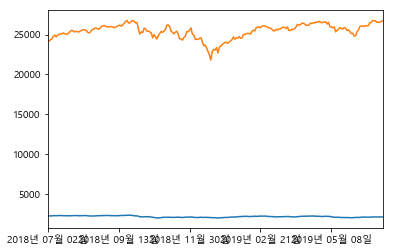

In [112]:
p = plt.rc('font',family = 'Malgun Gothic')
p = df['k종가'].plot()
p = df['d종가'].plot()

In [113]:
test_ratio = 0.1
test_m = int(len(x_3d)*test_ratio)
test_m

14

In [115]:
m = len(x_3d)
x_2d = np.reshape(x_3d,[m,-1])
y_2d = np.reshape(y_3d,[m,-1])

x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [116]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(normalize = True, solver='lsqr').fit(x_train,y_train)

In [117]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9362690496642989, -3.5139251690342013)

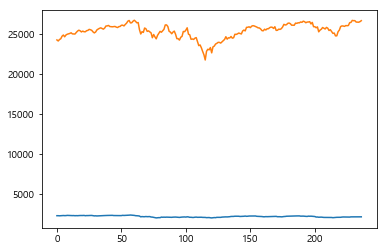

In [118]:
plt.plot(df['k종가'].values)
plt.plot(df['d종가'].values)

In [119]:
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent), [1, -1])
recent.shape

(1, 480)

In [120]:
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent),[1, -1])
recent.shape

(1, 480)

In [121]:
p = model.predict(recent)
p = np.reshape(p, [output_seq, -1])
p.shape

(30, 2)

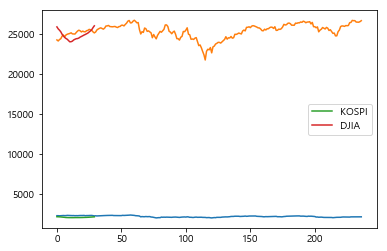

In [123]:
plt.plot(df['k종가'].values)
plt.plot(df['d종가'].values)
plt.plot(p[:,0], label = 'KOSPI')
plt.plot(p[:,1], label = 'DJIA')
plt.legend()

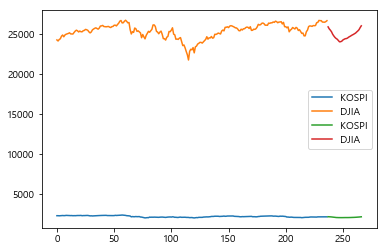

In [124]:
xm = len(df)
plt.plot(np.arange(xm), df['k종가'].values, label='KOSPI')
plt.plot(np.arange(xm), df['d종가'].values, label='DJIA')
plt.plot(np.arange(xm,xm+output_seq), p[:, 0], label='KOSPI')
plt.plot(np.arange(xm,xm+output_seq), p[:, 1], label='DJIA')
plt.legend()

## ======================================

## ======================================

## 2. loan default prediction > classification
 - input: 검색

In [131]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn

In [132]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [134]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0


In [135]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [136]:
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [137]:
loans = loans.dropna()
loans.isna().sum().sum()

0

In [139]:
loans_hot = pd.get_dummies(loans)

In [142]:
loans_hot.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0


In [144]:
y = loans_hot['not.fully.paid']
X = loans_hot.drop(columns='not.fully.paid')
X.shape, y.shape

((9516, 19), (9516,))

In [145]:
X.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0


In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)
x.shape, x_train.shape, x_test.shape

((60, 8), (7137, 19), (2379, 19))

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.8537200504413619, 0.8083228247162674)

In [155]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.848816029143898, 0.8284993694829761)

In [156]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
model = GradientBoostingClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8558217738545607, 0.830180748213535)

In [157]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8659100462379151, 0.8318621269440941)

In [158]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,50)).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8411097099621689, 0.8259773013871374)

In [159]:
pca = PCA(n_components=2).fit(loans_hot)
x_pca = pca.transform(loans_hot)

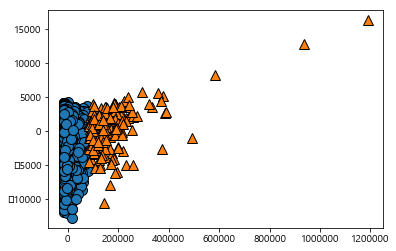

In [169]:
km = KMeans(n_clusters=2).fit_predict(x_pca)
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], km) # 예측

In [161]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

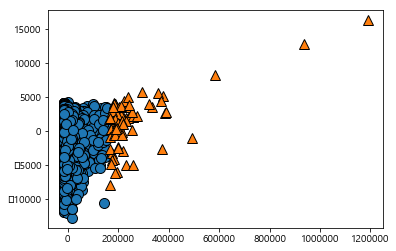

In [170]:
agg = AgglomerativeClustering(n_clusters=2).fit_predict(x_pca)
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], agg)

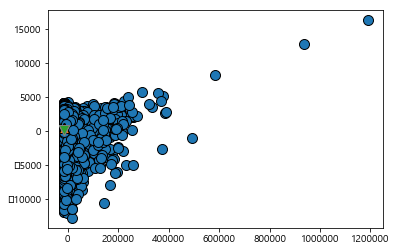

In [171]:
db = DBSCAN(eps=2.0).fit_predict(x_pca)  # k 개를 정해주지 않습니다.
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],db)

In [172]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [173]:
model.score(X, y)

0.842686002522068

In [174]:
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

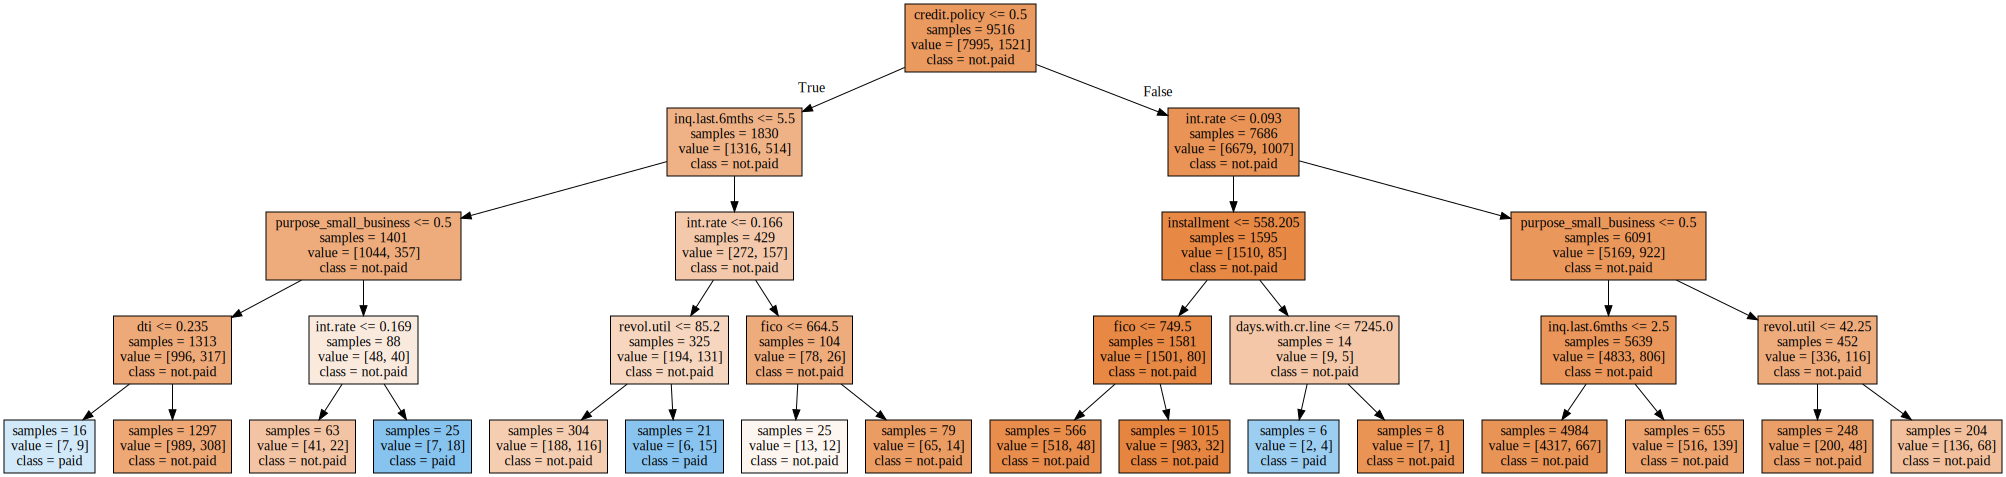

None

In [178]:
export_graphviz(model, out_file='loans.dot', class_names=['not.paid','paid'],
               feature_names=X.columns, impurity=False, filled=True)
with open('loans.dot') as f:
    dot_graph = f.read()
display(display(graphviz.Source(dot_graph)))

## ======================================

## ======================================

## 3. credit card fraud detection > clustering
 - input : 검색

In [192]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [193]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [195]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [199]:
(df['Class']==1).mean()

0.001727485630620034

In [202]:
df.isna().sum().sum()

0

In [203]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn

In [204]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [205]:
df1 = pd.get_dummies(df)
df1.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [215]:
pca = PCA(n_components=2).fit(df1)
df1_pca = pca.transform(df1)
df1_pca.shape

(284807, 2)

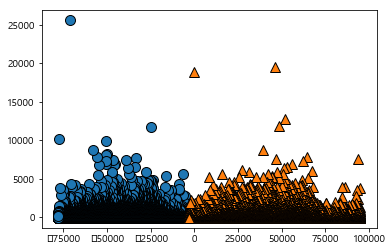

In [216]:
km = KMeans(n_clusters=2).fit_predict(df1_pca)
l = mglearn.discrete_scatter(df1_pca[:,0], df1_pca[:,1], km)

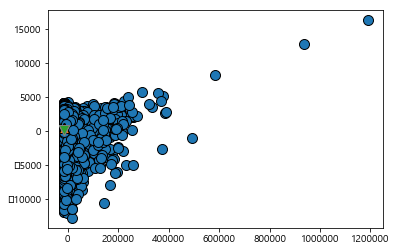

In [217]:
db = DBSCAN(eps=2.0).fit_predict(x_pca)  # k 개를 정해주지 않습니다.
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],db)

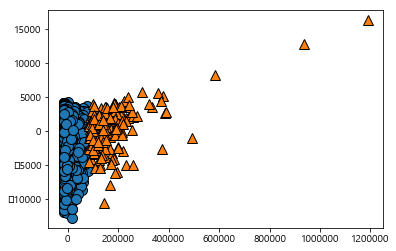

In [218]:
km = KMeans(n_clusters=2).fit(x_pca)
group = km.predict(x_pca)
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group)